In [1]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# added these dependencies
import json
import scipy.stats as st
from pprint import pprint
#this was already here
from scipy.stats import linregress

#Covid border shutdown : february 28-march 26, 2020

# URL for GET requests to retrieve vehicle data
url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-12-31"
default = "start=2020-01-01&end=2020-12-31" 
start_date = "2020-02-28"
end_date = "2020-03-26"
print(f'{url}{default}')
print(f'{url}start={start_date}&end={end_date}')


https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-12-31start=2020-01-01&end=2020-12-31
https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-12-31start=2020-02-28&end=2020-03-26


In [2]:
query_url = f'{url}start={start_date}&end={end_date}'

pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [3]:
response_url = f'{url}start={start_date}&end={end_date}'
print(requests.get(response_url))

<Response [200]>


In [4]:
pprint(requests.get(response_url).json())  

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [5]:
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price'])
test_df

,close date,close price
0,2020-01-01,7188.4633
1,2020-01-02,6961.5683
2,2020-01-03,7346.5800
3,2020-01-04,7355.8550
4,2020-01-05,7356.3117
...,...,...
81,2020-03-22,5803.6700
82,2020-03-23,6492.9400
83,2020-03-24,6766.7817
84,2020-03-25,6687.7050


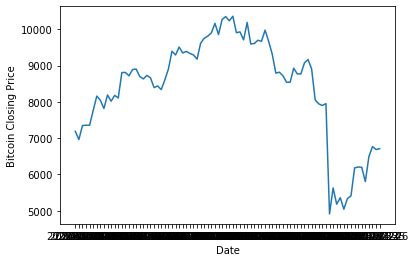

In [14]:
x_axis = test_df['close date']
y_axis = test_df['close price']
plt.xlabel('Date')
plt.ylabel('Bitcoin Closing Price')
plt.plot(x_axis, y_axis)

In [7]:
test_df.describe()

,close price
count,86.000000
mean,8383.921629
std,1414.275491
min,4914.085000
25%,7837.499150
50%,8722.258300
75%,9392.120400
max,10356.756700


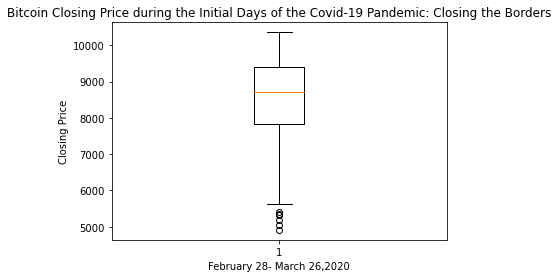

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_title('Bitcoin Closing Price during the Initial Days of the Covid-19 Pandemic: Closing the Borders')
ax1.set_ylabel('Closing Price')
ax1.boxplot(test_df['close price'])
plt.xlabel('February 28- March 26,2020')
plt.show()

#lots of outliers 

In [21]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = test_df['close price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of bitcoin closing prices is: {lowerq}")
print(f"The upper quartile of bitcoin closing prices is: {upperq}")
print(f"The interquartile range of bitcoin closing prices is: {iqr}")
print(f"The the median of bitcoin closing prices is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of bitcoin closing prices is: 7837.49915
The upper quartile of bitcoin closing prices is: 9392.1204
The interquartile range of bitcoin closing prices is: 1554.6212500000001
The the median of bitcoin closing prices is: 8722.258300000001 
Values below 5505.567274999999 could be outliers.
Values above 11724.052275 could be outliers.
